# 决策树——预测隐形眼睛类型

**决策树**

优点：计算复杂度不高，输出结果易于理解，对中间值缺失不敏感，可以处理不相关特征数据。

缺点：可能会产生过度匹配问题。

适用数据类型：数值型和标称型

创建分支伪代码：

```
检测数据集中每个子项是否属于同一分类：

    if so return 类标签；
    else
        寻找划分数据集的最好特征
        划分数据集
        创建分支节点
            for 每个划分的子集
                调用函数createBranch并增加返回结果到分支节点中
        return 分支结点
```
**决策树的一般流程**

1. 收集数据：anyway
2. 准备数据：树构造算法只适用于标称数据，数值型数据需要离散化
3. 分析数据：anyway，构造树之后，应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误
6. 使用算法：词步骤可以适用于任何监督学习算法，使用决策树可以更好地理解数据的内在含义。

In [1]:
from numpy import *
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    #1.为所有可能分类创建字典
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        shannonEnt -= prob * math.log(prob,2)#以2为底对数
    return shannonEnt

In [2]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels
myDat, labels = createDataSet()
calcShannonEnt(myDat)

0.9709505944546686

In [3]:
#增加类别
myDat[0][-1] = 'maybe'
calcShannonEnt(myDat)

1.3709505944546687

In [4]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [5]:
splitDataSet(myDat,0,1)

[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [6]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

In [7]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain, bestFeature = 0.0, -1
    for i in range(numFeatures):#先找每个特征的不同只
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)#唯一分类标签
        newEntropy = 0.0
        for value in uniqueVals:#计算每个特征划分的信息熵
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
        return bestFeature

In [8]:
myDat, labels = createDataSet()
chooseBestFeatureToSplit(myDat)

0

In [9]:
myDat#通过观察可以发现确实取第0特征信息增益最大

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [10]:
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),
                             key=lambda item:item[1],reverse=True)
    return sortedClassCount[0][0]

In [11]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    #1.类别完全相同停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #2.遍历完所有特征则返回出现次数最多的
    if len(dataSet[0]) == 1:
        return majoritycnt(classList)
    #3.得到列表包含的所有属性值
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet] #第几个特征被划分
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:] #复制label，因为参数传递的是引用
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [12]:
myData, labels = createDataSet()
myTree = createTree(myDat, labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [13]:
import matplotlib.pyplot as plt
#1.定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="<-")
#2.绘制带箭头的注解
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction', xytext=centerPt,\
                            textcoords='axes fraction', va='center', bbox=nodeType, arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode(U'决策节点', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode(U'叶节点', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

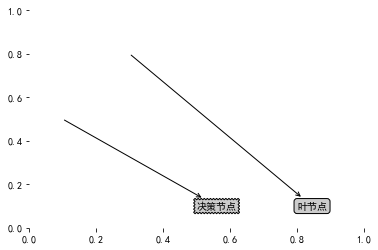

In [14]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
createPlot()

In [15]:
def getNumLeafs(myTree): #字典的遍历
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试结点数据类型是否为词典
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试结点数据类型是否为词典
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth>maxDepth:maxDepth = thisDepth
    return maxDepth

In [16]:
def retrieveTree(i):
    listOfTrees = [{'no surfacing': {0: 'no', 1: {'flippers': \
                     {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': \
                     {0: {'head':{0:'no', 1:'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [17]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [18]:
myTree = retrieveTree(0)

In [19]:
getNumLeafs(myTree)

3

In [20]:
getTreeDepth(myTree)

2

In [21]:
#plotTree函数
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

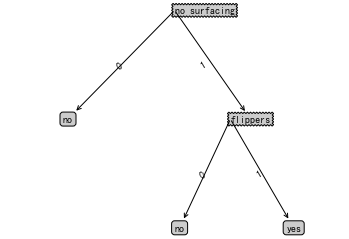

In [22]:
createPlot(myTree)

## 测试算法：使用决策树执行分类

In [23]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:classLabel = secondDict[key]
    return classLabel

In [24]:
#测试
myDat, labels = createDataSet()
labels

['no surfacing', 'flippers']

In [25]:
myTree = retrieveTree(0)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [26]:
classify(myTree, labels, [1,0])

'no'

In [27]:
classify(myTree, labels, [1,1])

'yes'

## 使用算法：决策树的存储

In [28]:
import pickle
def storeTree(inputTree, filename):
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree,fw)
        fw.close()
def grabTree(fileName):
    with open(fileName, 'rb') as fr:
        return pickle.load(fr)

In [29]:
storeTree(myTree, 'classifierStorage.txt')
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 示例：使用决策树预测隐形眼镜类型

1. 收集数据
2. 准备数据
3. 分析数据：使用createPlot()函数绘制树形图
4. 训练算法：使用createTree()函数
5. 测试算法：编写测试函数验证决策树可以正确分类给定的数据实例
6. 使用算法：存储树的数据结构，以便下次使用时无需重建树

In [30]:
with open('lenses.txt') as fr:
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    lensesTree = createTree(lenses,lensesLabels)
lensesTree

{'age': {'presbyopic': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': 'no lenses',
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}},
  'young': {'tearRate': {'hard': 'hard',
    'soft': 'soft',
    'no lenses': 'no lenses'}},
  'pre': {'prescript': {'hyper': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': 'no lenses'}},
    'myope': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
        'reduced': 'no lenses'}},
      'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}}}}}}

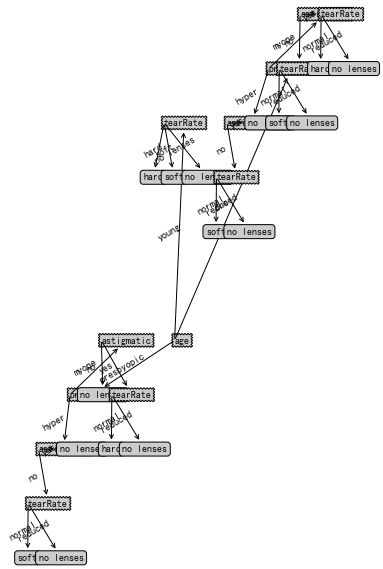

In [31]:
createPlot(lensesTree)